# Importing Libraries

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

# Extracting reviews from snapdeal website


In [2]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera , crisp display . The battery  issue has been solved with the latest ios9 update .',
 'Features are good....but the phone gets heated after some time',
 "It's cool phone, good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space, and almost 6 gb are already filled u \xa0read more  ",
 'Best phone my iPhone',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back',
 'Marvallous Phone...Ever used....You must buy',
 'Good  i phone mobile oparating essy , inter net fast working',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'Good buy at an affordable price during the sale.',
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also',
 'Amazing product at this p

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

# load the dataset

In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .','Features are good....but the phone gets heated after some time',"""It's cool phone",good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space,"and almost 6 gb are already filled u \xa0read more """,'Best phone my iPhone','I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back','Marvallous Phone...Ever used....You must buy','Good i phone mobile oparating essy,...,'Recently purchase the phone and was a bit doubtfull while purchasing,but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K','I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear','Awesome mobile working smooth just like an apple iPhone hahahaha its cool',"""I'm also happy with Snapdeal service""",'iphone really nice cell','Very good service by seller. Faster delivery and proper packing.','Good phone','Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)','Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.']


# Text processing

In [8]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera   crisp display . The battery  issue has been solved with the latest ios9 update .\'  \'Features are good....but the phone gets heated after some time\'  "It\'s cool phone  good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space  and almost 6 gb are already filled u \\xa0read more  "  \'Best phone my iPhone\'  \'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back\'  \'Marvallous Phone...Ever used....You must buy\'  \'Good  i phone mobile oparating essy   inter net fast working\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'Good buy at an affordable price during the sale.\'  \'I got my iPhone 5c white colour in good condition and best rate \\nsnapdeal rate is always lowest then other sites and store also\'  \'Amazing produ

In [9]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Have switched from android to apple and i am pretty satisfied with iPhone 5c  Excellent camera   crisp display  The battery  issue has been solved with the latest ios9 update   Features are goodbut the phone gets heated after some time  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    Best phone my iPhone  I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  Marvallous PhoneEver usedYou must buy  Good  i phone mobile oparating essy   inter net fast working  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Good buy at an affordable price during the sale  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Amazing product at this priceAt first I was reluctant to buy an apple product fro

In [10]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Have switched from android to apple and i am pretty satisfied with iPhone 5c  Excellent camera   crisp display  The battery  issue has been solved with the latest ios9 update   Features are goodbut the phone gets heated after some time  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    Best phone my iPhone  I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  Marvallous PhoneEver usedYou must buy  Good  i phone mobile oparating essy   inter net fast working  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Good buy at an affordable price during the sale  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Amazing product at this priceAt first I was reluctant to buy an apple product fro

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snehakoneru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Have', 'switched', 'from', 'android', 'to', 'apple', 'and', 'i', 'am', 'pretty', 'satisfied', 'with', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'The', 'battery', 'issue', 'has', 'been', 'solved', 'with', 'the', 'latest', 'ios9', 'update', 'Features', 'are', 'goodbut', 'the', 'phone', 'gets', 'heated', 'after', 'some', 'time', 'Its', 'cool', 'phone', 'good', 'processing', 'with', 'latest', 'iOS', 'The', 'cons', 'are', 'Low', 'memory', 'space', 'There', 'is', 'total', '8', 'gb', 'space', 'and', 'almost', '6', 'gb', 'are', 'already', 'filled', 'u', 'xa0read', 'more', 'Best', 'phone', 'my', 'iPhone', 'I', 'have', 'got', 'ths', 'phone', 'in', 'perfect', 'condition', 'and', 'thank', 'you', 'snapdeal', 'for', 'perfect', 'eliveryi', 'guess', 'ur', 'are', 'earning', 'the', 'trust', 'back', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'Good', 'i', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'The', 'OS', 'will', 'take', 'around', '5GB', 'l

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snehakoneru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehakoneru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'The', 'battery', 'issue', 'solved', 'latest', 'ios9', 'update', 'Features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'Its', 'cool', 'phone', 'good', 'processing', 'latest', 'iOS', 'The', 'cons', 'Low', 'memory', 'space', 'There', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'filled', 'u', 'xa0read', 'Best', 'phone', 'iPhone', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earning', 'trust', 'back', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'Good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'Good', 'buy', 'affordable', 'price', 'sale', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate

In [16]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['iphone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'amazing', 'product', 'priceat', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 'deal', 'made', 'crazy', 'n', 'ordered', 'fingers', 'cr', 'xa0read', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'very', 'good', 'phone', 'price', 'category', 'manufacturers', 'warranty', 'really', 'happy', 'product', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'good', 'product', 'satisfied', 'got', 'snapdeal', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'happy', 'iphone', 'ordering', 'phone', 'little', 'doubt', 'but', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iphoneearlier', 'doubted', 'awsme', 'delivry', 'time', 'product']


In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['iphon', '5c', 'white', 'colour', 'good', 'condit', 'best', 'rate', 'nsnapdeal', 'rate', 'alway', 'lowest', 'site', 'store', 'also', 'amaz', 'product', 'priceat', 'first', 'reluct', 'buy', 'appl', 'product', 'snapdeal', 'deal', 'made', 'crazi', 'n', 'order', 'finger', 'cr', 'xa0read', 'simpl', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'veri', 'good', 'phone', 'price', 'categori', 'manufactur', 'warranti', 'realli', 'happi', 'product', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'good', 'product', 'satisfi', 'got', 'snapdeal', 'awesom', 'iphon', 'price', 'rangeni', 'would', 'recommend', 'phone', 'happi', 'iphon', 'order', 'phone', 'littl', 'doubt', 'but', 'receiv', 'phone', 'realli', 'happyalso', 'found', 'origin', 'iphoneearli', 'doubt', 'awsm', 'delivri', 'time', 'product']


In [18]:
!pip3 install en_core_web_sm
!python -m spacy download %


✘ No compatible package found for '%' (spaCy v3.7.0)



In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

have switched android apple pretty satisfied iphone 5c excellent camera crisp display the battery issue solved latest ios9 update features goodbut phone gets heated time its cool phone good processing latest ios the cons low memory space there total 8 gb space almost 6 gb already filled u xa0read best phone iphone got ths phone perfect condition thank snapdeal perfect eliveryi guess ur earning trust back marvallous phoneever usedyou must buy good phone mobile oparating essy inter net fast working the os take around 5gb leaving 3 gb files unless youre heavy files user good buy affordable price sale got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also amazing product priceat first reluctant buy apple product snapdeal deal made crazy n ordered fingers cr xa0read simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need very good phone price category manufacturers warranty really happy p

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['have', 'switch', 'android', 'apple', 'pretty', 'satisfied', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'the', 'battery', 'issue', 'solve', 'late', 'ios9', 'update', 'feature', 'goodbut', 'phone', 'get', 'heated', 'time', 'its', 'cool', 'phone', 'good', 'processing', 'late', 'io', 'the', 'con', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'fill', 'u', 'xa0read', 'good', 'phone', 'iphone', 'get', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'work', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 'be', 'heavy', 'file', 'user', 'good', 'buy', 'affordable', 'price', 'sale', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rate', 'nsnapdeal', 'rate', 'always', 'l

In [21]:
clean_comments=' '.join(lemmas)
clean_comments

'have switch android apple pretty satisfied iphone 5c excellent camera crisp display the battery issue solve late ios9 update feature goodbut phone get heated time its cool phone good processing late io the con low memory space there total 8 gb space almost 6 gb already fill u xa0read good phone iphone get ths phone perfect condition thank snapdeal perfect eliveryi guess ur earn trust back marvallous phoneever usedyou must buy good phone mobile oparating essy inter net fast work the os take around 5 gb leave 3 gb file unless you be heavy file user good buy affordable price sale get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also amazing product priceat first reluctant buy apple product snapdeal deal make crazy n order finger cr xa0read simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need very good phone price category manufacturer warranty really happy product good price great sell

# Feature Extraction

# 1. Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'have': 155, 'switch': 353, 'android': 26, 'apple': 28, 'pretty': 257, 'satisfied': 303, 'iphone': 174, '5c': 7, 'excellent': 121, 'camera': 56, 'crisp': 85, 'display': 104, 'the': 360, 'battery': 38, 'issue': 177, 'solve': 340, 'late': 186, 'ios9': 173, 'update': 385, 'feature': 127, 'goodbut': 146, 'phone': 248, 'get': 142, 'heated': 158, 'time': 371, 'its': 181, 'cool': 78, 'good': 145, 'processing': 266, 'io': 171, 'con': 73, 'low': 196, 'memory': 204, 'space': 342, 'there': 361, 'total': 376, 'gb': 140, 'almost': 19, 'already': 20, 'fill': 130, 'xa0read': 411, 'ths': 368, 'perfect': 244, 'condition': 74, 'thank': 357, 'snapdeal': 336, 'eliveryi': 114, 'guess': 150, 'ur': 388, 'earn': 112, 'trust': 382, 'back': 37, 'marvallous': 200, 'phoneever': 249, 'usedyou': 390, 'must': 213, 'buy': 54, 'mobile': 207, 'oparating': 232, 'essy': 116, 'inter': 168, 'net': 219, 'fast': 126, 'work': 407, 'os': 237, 'take': 354, 'around': 29, 'leave': 187, 'file': 129, 'unless': 384, 'you': 413, 'be

In [25]:
print(cv.get_feature_names_out()[100:200])

['did' 'dis' 'discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted'
 'doubtfull' 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy'
 'even' 'ever' 'everyone' 'everything' 'excellent' 'expectation'
 'experience' 'fake' 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find'
 'finger' 'first' 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb'
 'genuine' 'get' 'gift' 'go' 'good' 'goodbut' 'goood' 'grand' 'great'
 'guess' 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear'
 'heated' 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv'
 'in' 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9'
 'iphone' 'iphone5c' 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its'
 'job' 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark']


In [26]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(clean_commentscv.toarray().shape)

(1028, 414)


# 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [30]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'be' 'body' 'budget'
 'but' 'buy' 'camera' 'cheap' 'condition' 'day' 'deal' 'deliver'
 'delivery' 'do' 'even' 'excellent' 'experience' 'fast' 'feature' 'file'
 'first' 'gb' 'genuine' 'get' 'go' 'good' 'great' 'hang' 'happy' 'have'
 'interest' 'io' 'ios' 'iphone' 'issue' 'it' 'its' 'job' 'late' 'like'
 'look' 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'nt' 'one' 'order'
 'original' 'pack' 'perfect' 'phone' 'plastic' 'price' 'problem' 'product'
 'provide' 'quality' 'rate' 'really' 'receive' 'recommend' 'review'
 'satisfactory' 'satisfied' 'scheme' 'seller' 'service' 'shop' 'site'
 'smooth' 'snap' 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the'
 'this' 'though' 'till' 'time' 'use' 'very' 'want' 'well' 'within' 'worth'
 'would' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3. TF-IDF Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'ca' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge'
 'cheap' 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit'
 'compare' 'competitive' 'con' 'condition' 'conditionnno' 'consist'
 'contact' 'cool' 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit'
 'crisp' 'customer' 'damage' 'dat' 'datum' 'day' 'daynand' 'deal' 'dear'
 'decide' 'defination' 'deliver' 'delivery' 'delivry' 'dere' 'did' 'dis'
 'discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull'
 'dream' 'dt' 'du

# Generate Word Cloud

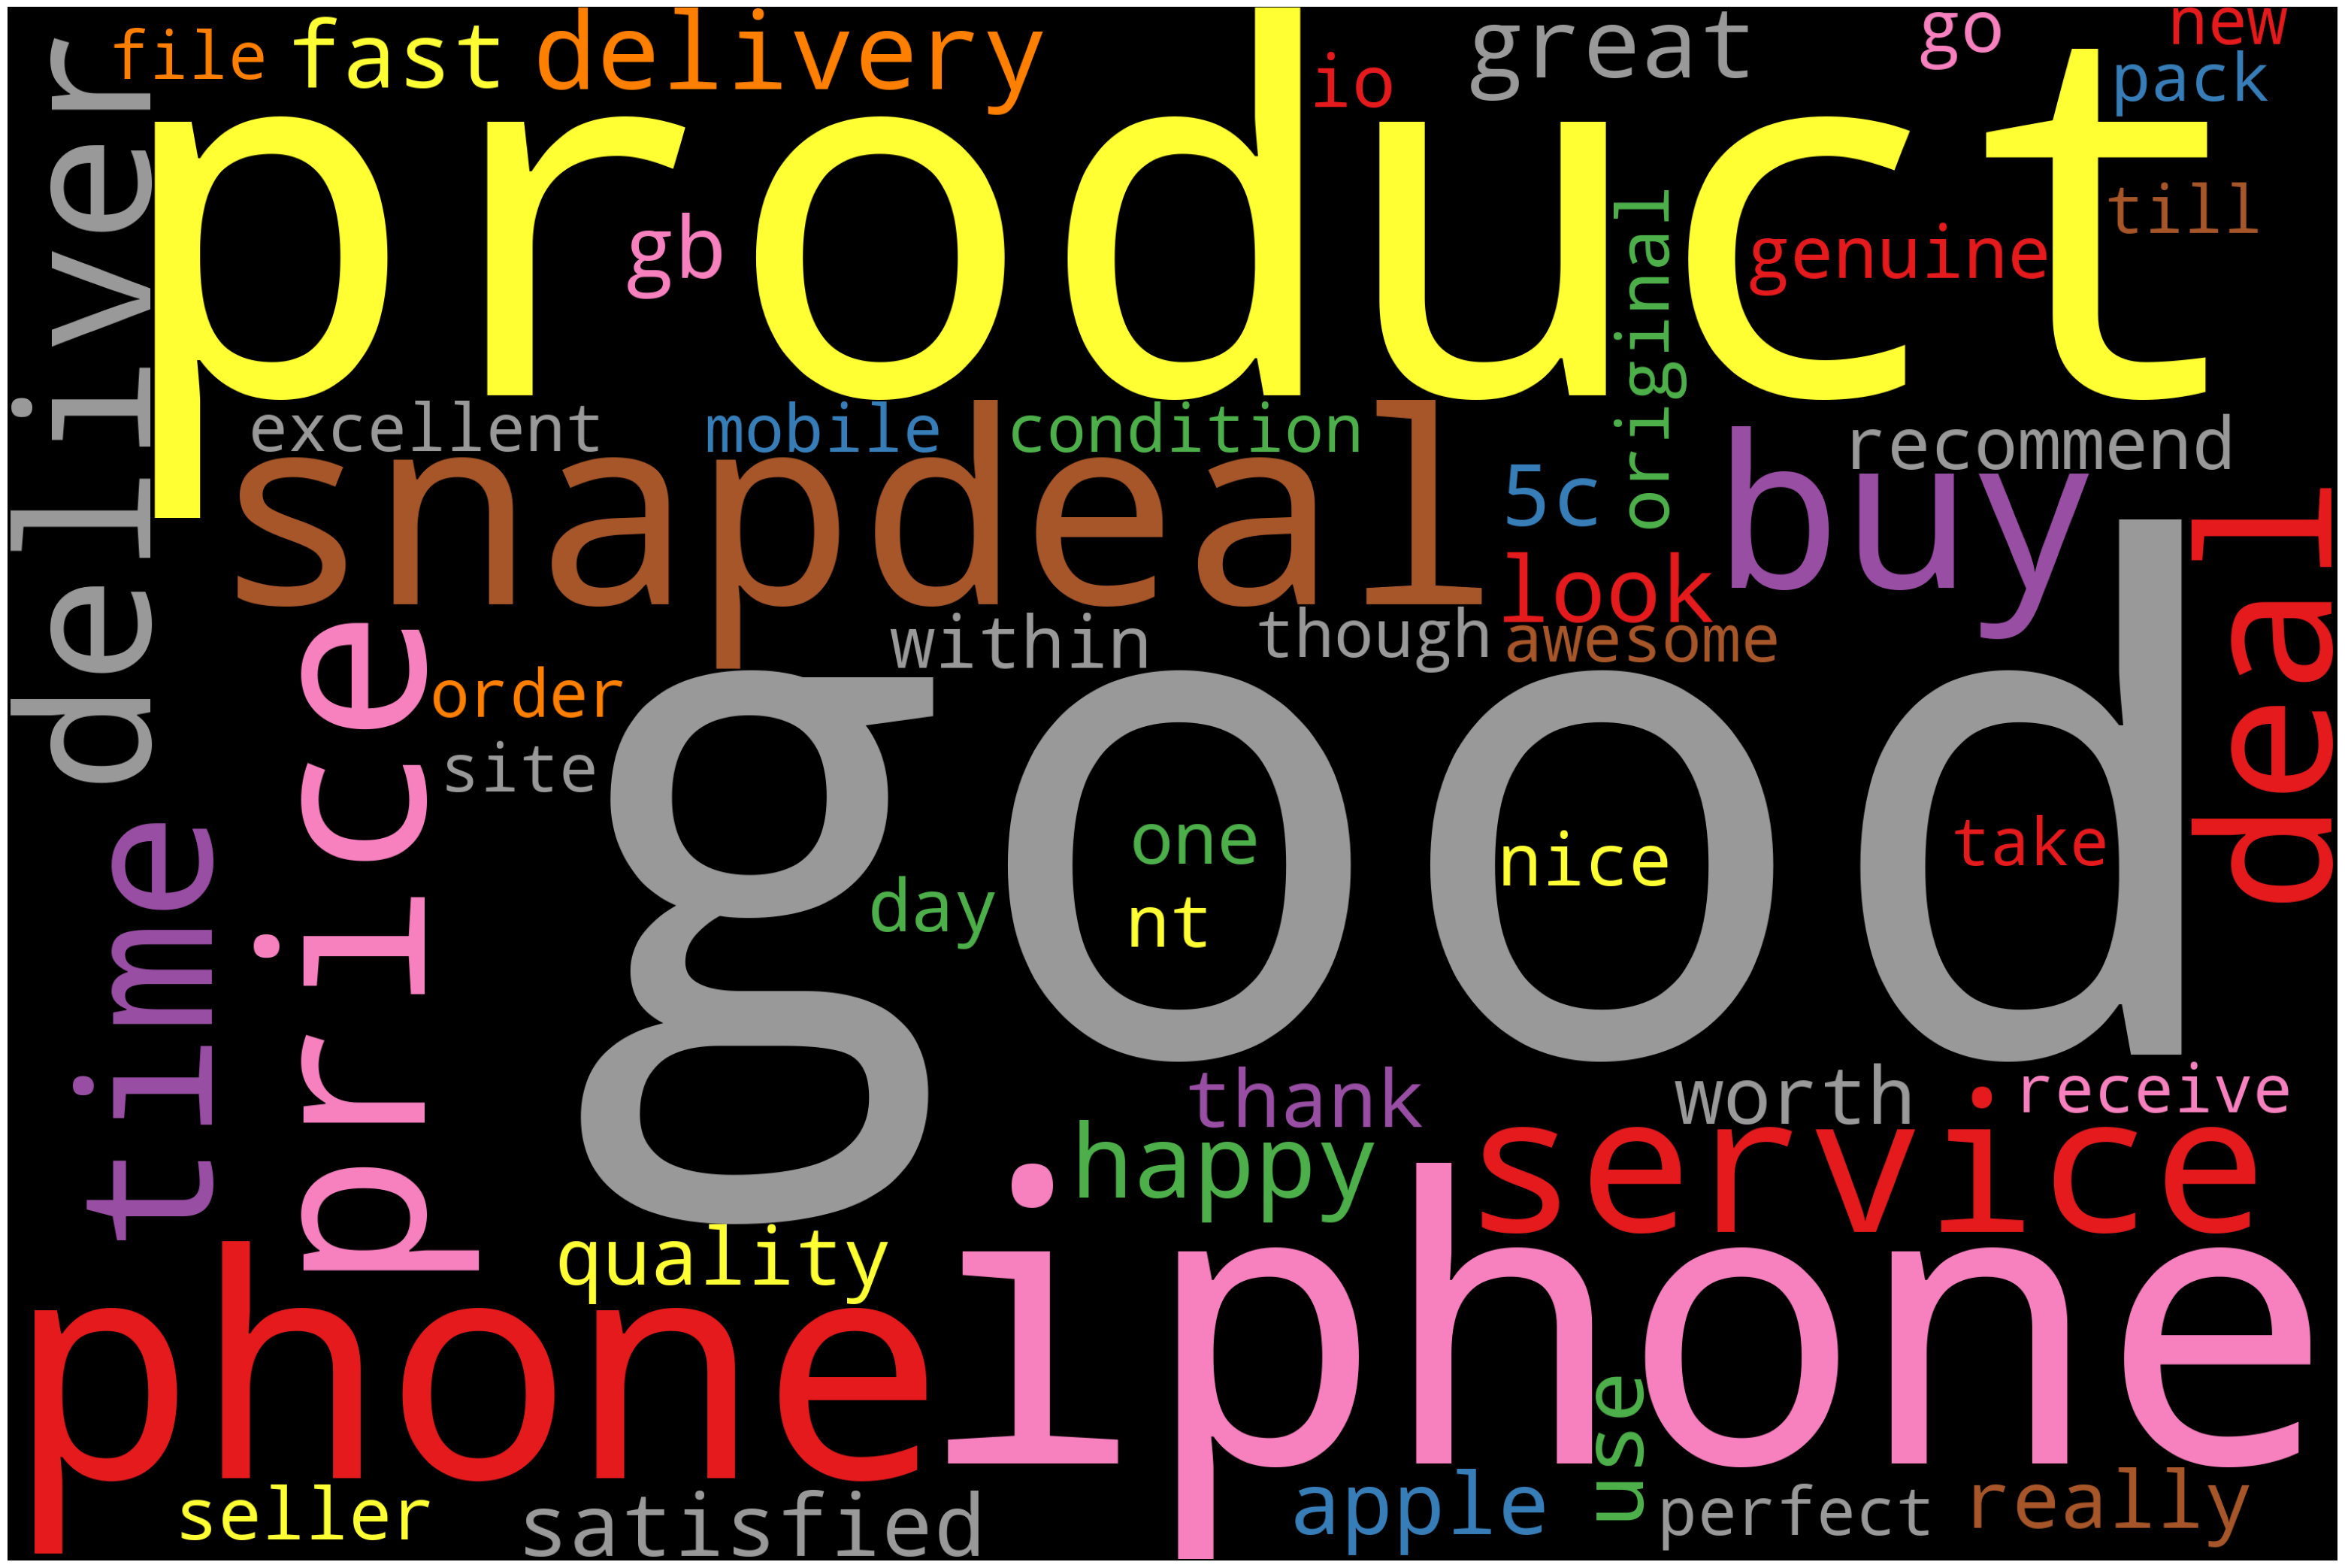

In [34]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [36]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
from spacy import displacy
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [37]:
for token in doc_block[100:200]:
    print(token,token.pos_)

sale NOUN
get VERB
iphone NOUN
5c NUM
white ADJ
colour NOUN
good ADJ
condition NOUN
good ADJ
rate NOUN
nsnapdeal NOUN
rate NOUN
always ADV
low ADJ
site NOUN
store NOUN
also ADV
amazing ADJ
product NOUN
priceat NOUN
first ADV
reluctant ADJ
buy VERB
apple NOUN
product NOUN
snapdeal ADJ
deal NOUN
make VERB
crazy ADJ
n NOUN
order NOUN
finger NOUN
cr PROPN
xa0read PUNCT
simple ADJ
nall PROPN
thing PROPN
u PROPN
need VERB
ni PROPN
buy VERB
2 NUM
year NOUN
snapdeal NOUN
still ADV
perfect VERB
conditionnno ADJ
lagging NOUN
till SCONJ
todaynsuitable ADJ
business NOUN
need VERB
very ADV
good ADJ
phone NOUN
price NOUN
category NOUN
manufacturer NOUN
warranty NOUN
really ADV
happy ADJ
product NOUN
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
good ADJ
product NOUN
satisfied ADJ
get VERB
snapdeal ADJ
awesome ADJ
iphone NOUN
price NOUN
rangeni NOUN
would AUX
recommend VERB
phone NOUN
happy ADJ
iphone NOUN
order NOUN
phone NOUN
little ADJ
dou

In [38]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'doubt', 'receive', 'phone', 'find', 'delivry', 'time', 'product', 'recievd', 'condition', 'think', 'site', 'shop', 'deliver', 'seal', 'box', 'deal', 'promptness', 'delivery', 'product', 'receive', 'satisfy', 'product', 'brand', 'iphone', 'get', 'hour', 'order', 'pack', 'superb', 'priority', 'product', 'thank', 'snepdeal', 'piece', 'deliver', 'condition', 'receive', 'discount', '1000rs', 'charge', 'coupon', 'deliver', 'day', 'commit', 'delivery', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'iphone', 'product', 'price', 'day', 'get', 'product', 'site', 'working', 'day', 'product', 'recommend', 'friend', 'family', 'member', 'iphone', 'thank', 'provide', 'product', 'choice', 'deal', 'lack', 'feel', 'awesum', 'phonegood', 'price', 'productiphone', 'accessory', 'deliver', 'time', 'product', 'model', 'snapdeal', 'deliver', 'promise', 'time', 'product', 'quality', 'thing', 'memory', 'capacity', 'store', 'datum', 'buy', 'product', 'product', 'deliver']


In [39]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,time,11
7,deal,11
8,deliver,11
9,delivery,11


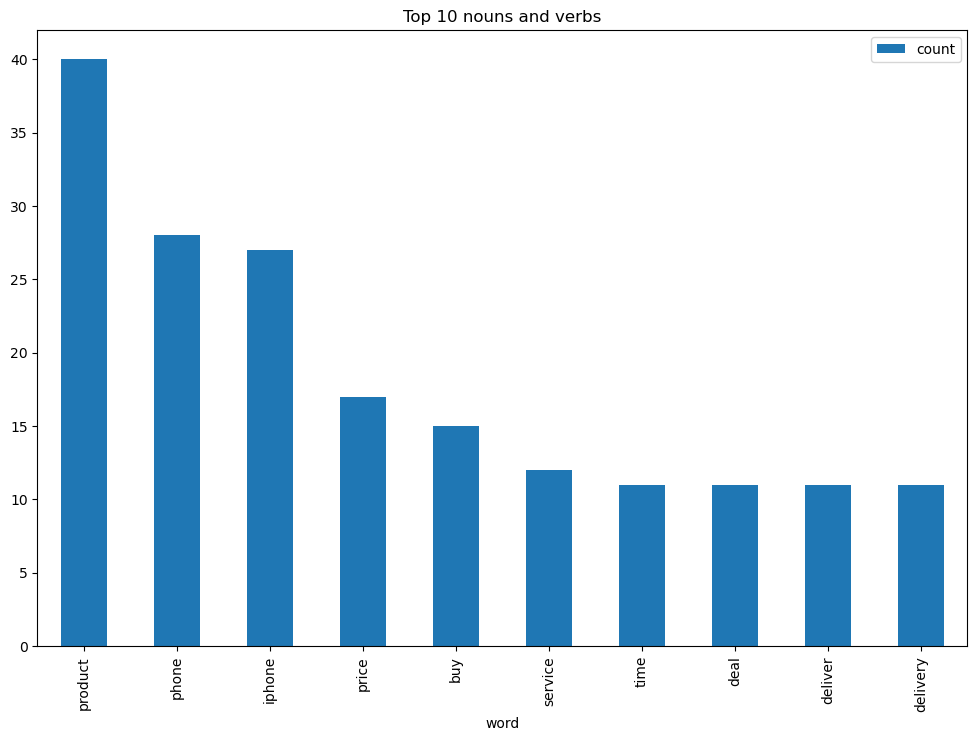

In [40]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [57]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Have switched from android to apple and i am pretty satisfied with iPhone 5c .',
 'Excellent camera , crisp display .',
 'The battery  issue has been solved with the latest ios9 update .',
 "Features are good....but the phone gets heated after some time It's cool phone, good processing with latest iOS.",
 'The cons are: Low memory space.',
 'There is total 8 gb space, and almost 6 gb are already filled u \xa0read more   Best phone my iPhone I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back Marvallous Phone...Ever used....You must buy Good  i phone mobile oparating essy , inter net fast working The OS will take around 5GB, leaving only 3 GB for your files.',
 "Unless you're not a heavy files user.",
 'Good buy at an affordable price during the sale.',
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also Amazing product at this price....

In [58]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Have switched from android to apple and i am p...
1,"Excellent camera , crisp display ."
2,The battery issue has been solved with the la...
3,Features are good....but the phone gets heated...
4,The cons are: Low memory space.
...,...
123,Faster delivery and proper packing.
124,Good phone Beautiful Product.
125,Original Apple Product and delivery in 2nd day.
126,And iPhone is iPhone ;-) Good budgeted iphone.


In [59]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [60]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [61]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [62]:
# manual testing
calculate_sentiment(text='great')

3

In [63]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      3
2      1
3      7
4      0
      ..
123    0
124    3
125    0
126    0
127    1
Name: sentiment_value, Length: 128, dtype: int64

In [64]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      15
1       6
2      12
3      18
4       6
       ..
123     5
124     4
125     8
126     8
127    16
Name: word_count, Length: 128, dtype: int64

In [65]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
46,But those all reviews are fake and just to dam...,-6,14
106,Dere is only one problem nd dat is space... Bt...,-4,20
67,Dont buy on fraudulent schemes.,-4,5
97,Only problem is you need to pay for everything.,-3,9
9,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
88,"Pros : Picture quality is awesome, sound with ...",12,38
68,Mobile was got no hang smooth touch performi...,16,29
122,i would recommended Snapdeal service my near &...,16,36
34,awesum phone.good price good product.iphone is...,23,69


In [66]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    128.000000
mean       2.835938
std        4.425725
min       -6.000000
25%        0.000000
50%        2.000000
75%        3.250000
max       25.000000
Name: sentiment_value, dtype: float64

In [67]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
4,The cons are: Low memory space.,0,6
6,Unless you're not a heavy files user.,0,7
9,no lagging till today\nsuitable for your busin...,-3,9
12,Genuine Product.,0,2
13,Fast Shipping.,0,2
19,It is a brand new 100% genuine iphone.,0,8
20,And got it within 24 hours of ordering....,0,8
26,This product is awwsum in use... As by looks a...,0,10
28,Within one day I got the product though in sit...,0,14
33,Lacks the feel.,-2,3


In [68]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Have switched from android to apple and i am p...,3,15
1,"Excellent camera , crisp display .",3,6
2,The battery issue has been solved with the la...,1,12
3,Features are good....but the phone gets heated...,7,18
5,"There is total 8 gb space, and almost 6 gb are...",11,71
...,...,...,...
119,Good build quality\n\nCons\n1.Plastic body\n2.,3,7
120,8GB memory\n\nBut even plastic body looks attr...,3,14
122,i would recommended Snapdeal service my near &...,16,36
124,Good phone Beautiful Product.,3,4


In [69]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Have switched from android to apple and i am p...,3,15,0
1,"Excellent camera , crisp display .",3,6,1
2,The battery issue has been solved with the la...,1,12,2
3,Features are good....but the phone gets heated...,7,18,3
4,The cons are: Low memory space.,0,6,4
...,...,...,...,...
123,Faster delivery and proper packing.,0,5,123
124,Good phone Beautiful Product.,3,4,124
125,Original Apple Product and delivery in 2nd day.,0,8,125
126,And iPhone is iPhone ;-) Good budgeted iphone.,0,8,126


/var/folders/gh/_7nf_xl92bd8fjzld_vp7b8m0000gn/T/ipykernel_7920/3324071075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

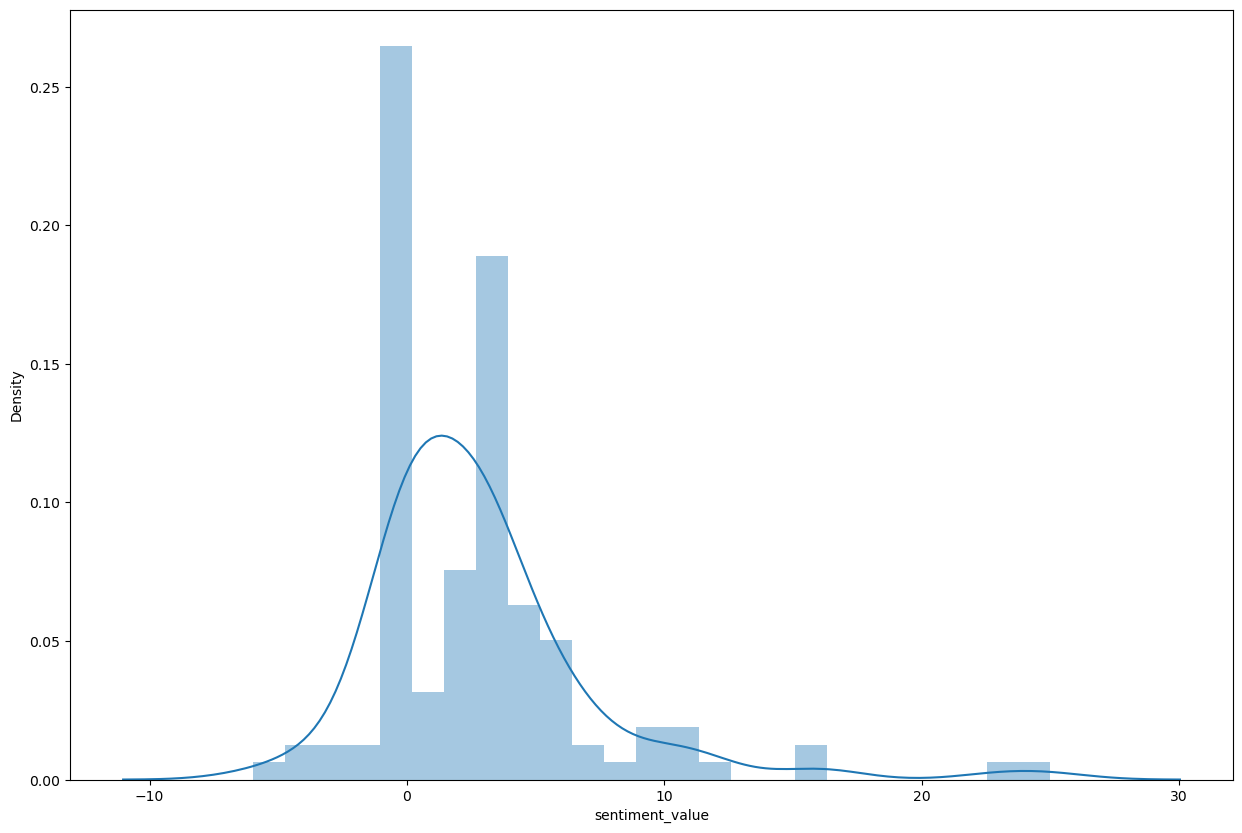

In [70]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

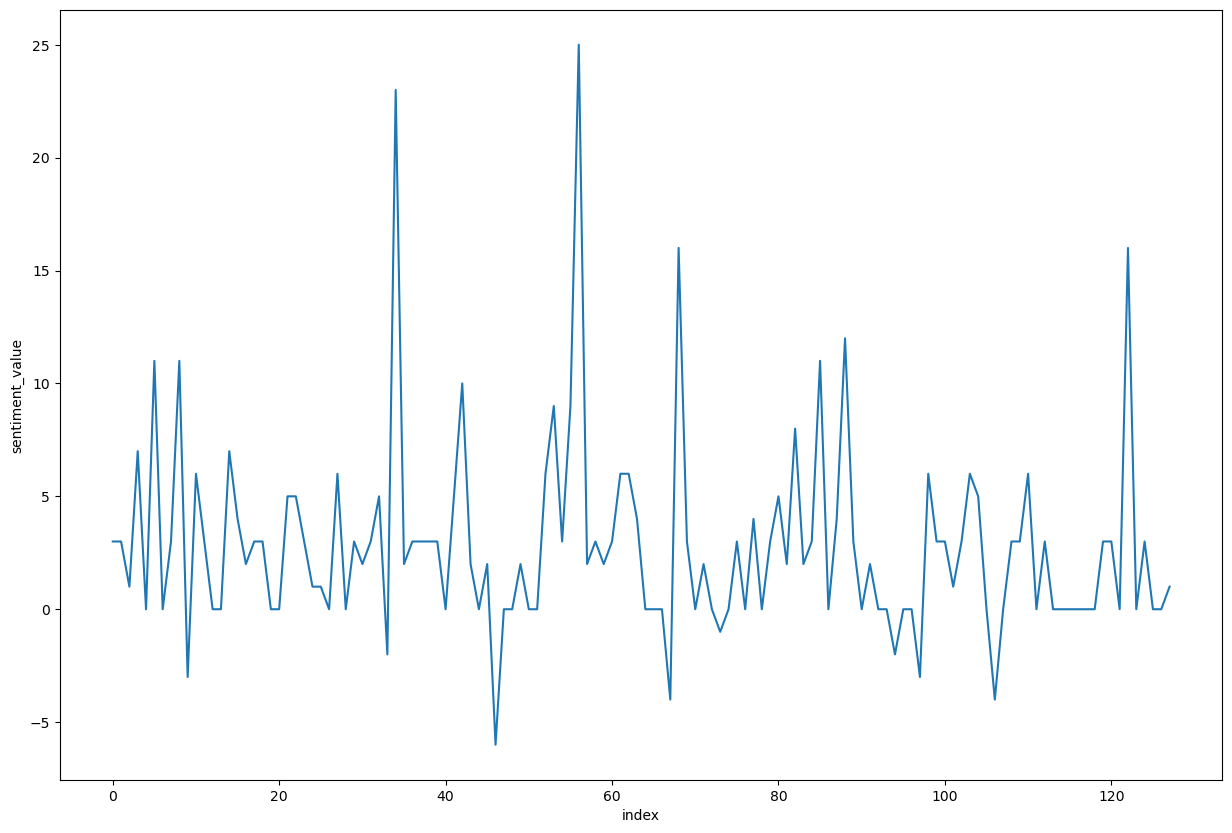

In [71]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

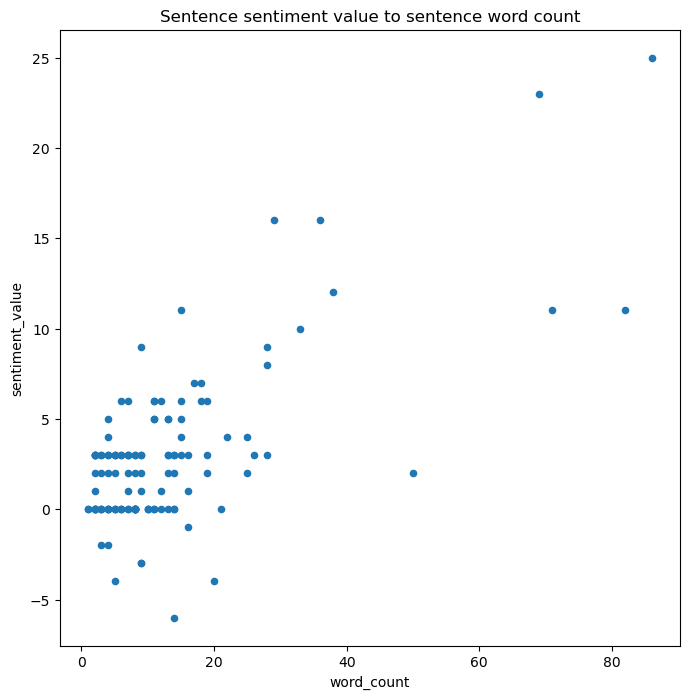

In [72]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
